In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import b_value_functions1 as b_value_functions # these are the functions in the .py file 
from datetime import datetime
import statistics

In [33]:
# Read in the example catalog 
#catalog = pd.read_csv(r"C:\Users\Matthew Salinas\OneDrive - University of Southern California\Yihe (2)\Yihe\UTAH\2022\Dyer_Karvounis_Bethmann_April_2022_UtahFORGE\forgeseis.csv")
catalog = pd.read_csv(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe (2)/Yihe/UTAH/2022/Dyer_Karvounis_Bethmann_April_2022_UtahFORGE/forgeseis.csv')
#catalog

In [36]:

from datetime import timedelta
# create injection end time
stInj = datetime(2022,4,21,12,48,22)
timd = timedelta(minutes=281.0167)
injEnd = ((stInj+timd)-stInj).total_seconds()/86400.0
print(injEnd)
injSt= stInj.timestamp()/86400.0
print(injSt)
print((stInj+timd).timestamp()/86400-injSt)

0.1951504861111111
19103.700254629628
0.19515048611356178


In [6]:
dt=[]
dto=[]
for i in range(len(catalog["Origin Date"])):
    
    date = list(map(int,catalog["Origin Date"][i].strip().split("/")))
    time = list(map(float,catalog["Origin Time"][i].strip().split(":")))
    #print(date,time)
    dtTemp = (datetime(date[2],date[1],date[0],int(time[0]),int(time[1]),int(time[2])))
    dt.append(dtTemp.timestamp()/86400-injSt)
    dto.append(dtTemp)

print(len(dt))

13136


In [7]:
# Filters all arrays according to injection start and end dates, chatgpt assisted
dtF, magF, xf, yf, depf,  = zip(*[
    (d, m, x, y, dp)
    for d, m, x, y, dp in zip(dt, catalog['MomMag'], catalog['X'], catalog['Y'], catalog['Depth'])
    if injSt-injSt <= d <= injEnd
])
print(len(magF),len(dtF))

7295 7295


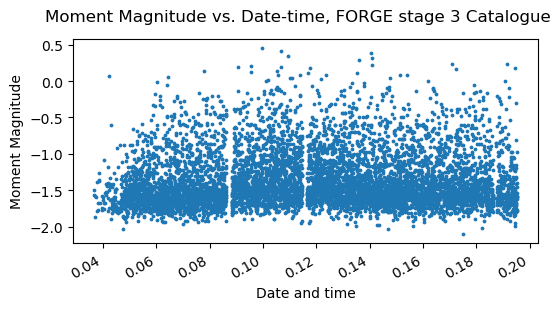

In [8]:
figure = plt.figure(figsize = [6,3])
ax1 = figure.add_subplot(111)
ax1.scatter(dtF,magF,s=3)
figure.suptitle("Moment Magnitude vs. Date-time, FORGE stage 3 Catalogue")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("Moment Magnitude")
#ax1.set_xlim([datetime(2022,4,21,13),datetime(2022,4,22)])
figure.autofmt_xdate()
plt.show()

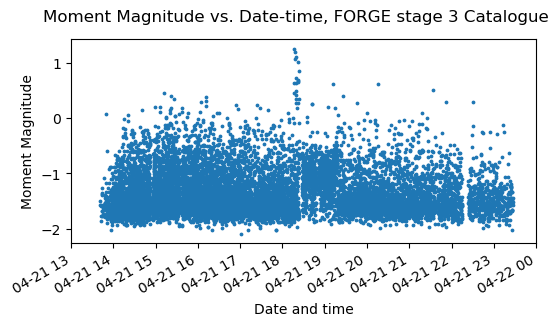

In [9]:
figure = plt.figure(figsize = [6,3])
ax1 = figure.add_subplot(111)
ax1.scatter(dto,catalog['MomMag'],s=3)
figure.suptitle("Moment Magnitude vs. Date-time, FORGE stage 3 Catalogue")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("Moment Magnitude")
ax1.set_xlim([datetime(2022,4,21,13),datetime(2022,4,22)])
figure.autofmt_xdate()
plt.show()

In [10]:
dtF = np.array(dtF)
magF= np.array(magF)
xf = np.array(xf)
yf= np.array(yf)
depf=np.array(depf)

idx = np.argsort(dtF)

dtF = dtF[idx]
magF = magF[idx]
xf = xf[idx]
yf = yf[idx]
depf = depf[idx]

In [11]:
xref = statistics.median(xf[1:11])
yref = statistics.median(yf[1:11])
zref = statistics.median(depf[1:11])
print(xref,yref,zref)

3154.0 -844.0 8223.0


In [12]:
dist = np.sqrt((np.array(xf)-xref)**2+(np.array(yf)-yref)**2+(np.array(depf)-zref)**2)
print(len(dist))

7295


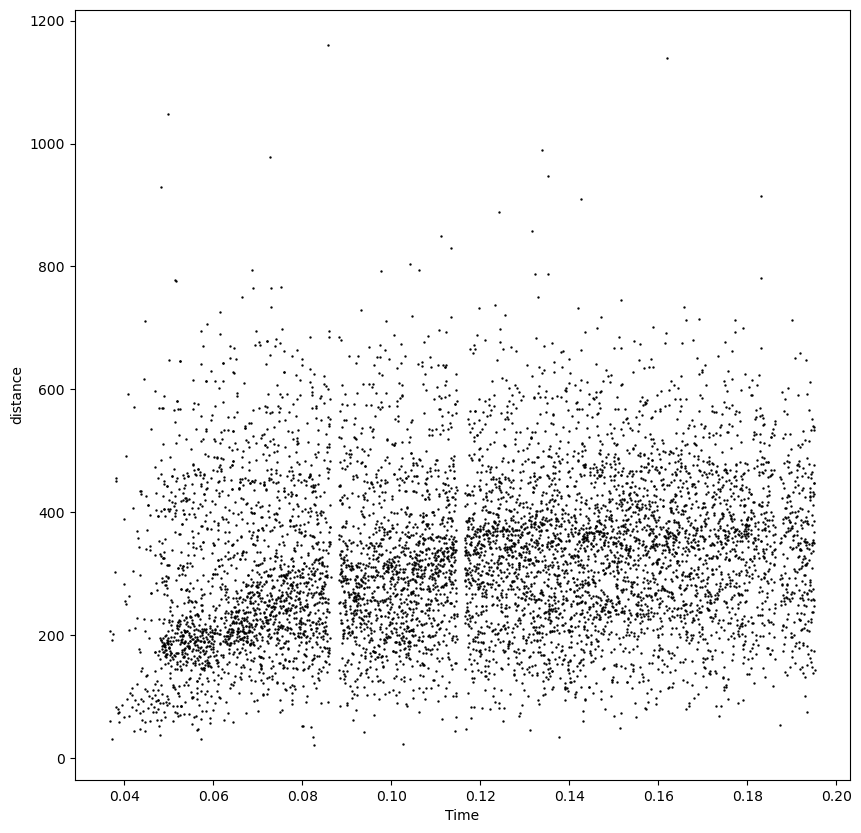

In [13]:
fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(dtF,dist,s=0.5,color='k')
ax1.set_xlabel("Time")
ax1.set_ylabel("distance")
#ax1.set_xlim([datetime(2022,4,21,13),datetime(2022,4,22)])
plt.show()

In [14]:
# create referential list to sort dist
dstc = dist.copy()
dstRef=[]
for i in range(len(dstc)):
    dstRef.append(i)

In [15]:
def quicksort_with_swaps(arr1, arr2, low, high):
    if low < high:

        pivot_index = partition(arr1, arr2, low, high)


        quicksort_with_swaps(arr1, arr2, low, pivot_index)
        quicksort_with_swaps(arr1, arr2, pivot_index + 1, high)

def partition(arr1, arr2, low, high):

    pivot = arr1[(low + high) // 2]
    i = low - 1
    j = high + 1

    while True:
        i += 1
        while arr1[i] < pivot:
            i += 1

        j -= 1
        while arr1[j] > pivot:
            j -= 1

        if i >= j:
            return j


        arr1[i], arr1[j] = arr1[j], arr1[i]
        arr2[i], arr2[j] = arr2[j], arr2[i]


Sorted array1: [1, 1, 2, 3, 4, 5, 6, 9]
Corresponding sorted array2: ['a', 'a', 'b', 'c', 'd', 'e', 'f', 'i']


In [18]:
#make copy of distance array and an array referencing distance copy
dstc2 = dist.copy()
dstRef2=[]
for i in range(len(dstc2)):
    dstRef2.append(i)

In [19]:
print(len(dstc2))
print(len(dstRef2))

7295
7295


In [20]:
# sort distance array and sort reference array along with
quicksort_with_swaps(dstc2,dstRef2 , 0, len(dstc2) - 1)

In [21]:
# create 2d array to arrange shells of references based on distance
rDivs2=[[] for i in range(2)]
rDmaxRad2=[]
count=0
rpl=0
for i in range(len(dstc2)):
    if count <3648:
        rDivs2[rpl].append(dstRef2[i])
        count +=1
    if count ==3648:
        count = 0
        rpl+=1
        rDmaxRad2.append(dstc2[i])

In [22]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    
    return quicksort(left) + middle + quicksort(right)


[1, 1, 2, 3, 6, 8, 10]


In [23]:
# sort the reference array of each shell, making it so each shell is now ordered by date
sDivs2=[[] for i in range(2)]
for i in range(2):
    sDivs2[i]=quicksort(rDivs2[i])

In [24]:

rDmaxRad2.append(dstc2[len(dstc2)-1])
print(rDmaxRad2)

[np.float64(314.40260813167566), np.float64(1160.6519719536946)]


In [25]:
# bin stuff
bins = np.arange(-2, 6, 0.1)
mid_bins = (bins[:-1] + bins[1:])/2

br2=[[] for i in range(2)]
bpr2=[[] for i in range(2)]
dtr2=[[] for i in range(2)]
lbr2=[[] for i in range(2)]
hbr2=[[] for i in range(2)]
stdr2=[[] for i in range(2)]
lbpr2=[[] for i in range(2)]
hbpr2=[[] for i in range(2)]
stdpr2=[[] for i in range(2)]
mxmr2=[[] for i in range(2)]
mxdr2=[[] for i in range(2)]

for i in range(2):
    print(i)
    
    for x in range(300,len(sDivs2[i]),30):
        mxt =[]
        mxm=-10
        md=0
        for j in range(x-300,x):
            mxt.append(magF[sDivs2[i][j]])
            if mxt[-1]>mxm:
                mxm=mxt[-1]
                md=dtF[sDivs2[i][j]]
        mxT=np.array(mxt)
        mxmr2[i].append(mxm)
        mxdr2[i].append(md)
        #print(mxT)
        b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
        hist1, bP = b_value_functions.bpos(mxT)
        low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.01)    
        low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.01)
        br2[i].append(b)
        dtr2[i].append(dtF[sDivs2[i][x]])
        if (x>300 and dtr2[i][-1] < dtr2[i][-2]):
            print(dtr2[i][-1] , dtr2[i][-2], x)
        bpr2[i].append(bP)
        lbr2[i].append(low_b)
        lbpr2[i].append(low_bp)
        hbr2[i].append(high_b)
        hbpr2[i].append(high_bp)
        stdr2[i].append(std)
        stdpr2[i].append(stdp)
        

0
1


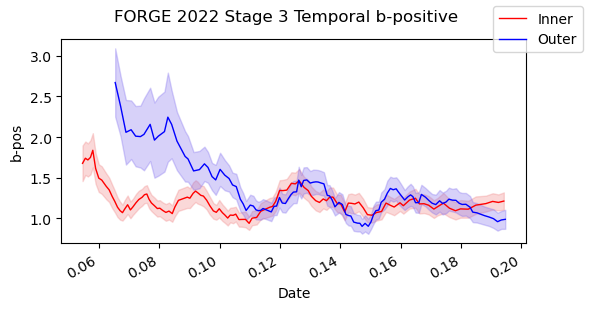

In [26]:
fig, ax1 = plt.subplots(figsize=(6,3))
fig.suptitle("FORGE 2022 Stage 3 Temporal b-positive")
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')
#ax1.set_xlim([datetime(2022,4,21,13),datetime(2022,4,22)])
#ax1.set_ylim([1,2])
fig.autofmt_xdate()
ax1.set_ylabel('b-pos')
ax1.set_xlabel('Date')

fig.autofmt_xdate()
fig.legend(loc = 'upper right')
plt.show()

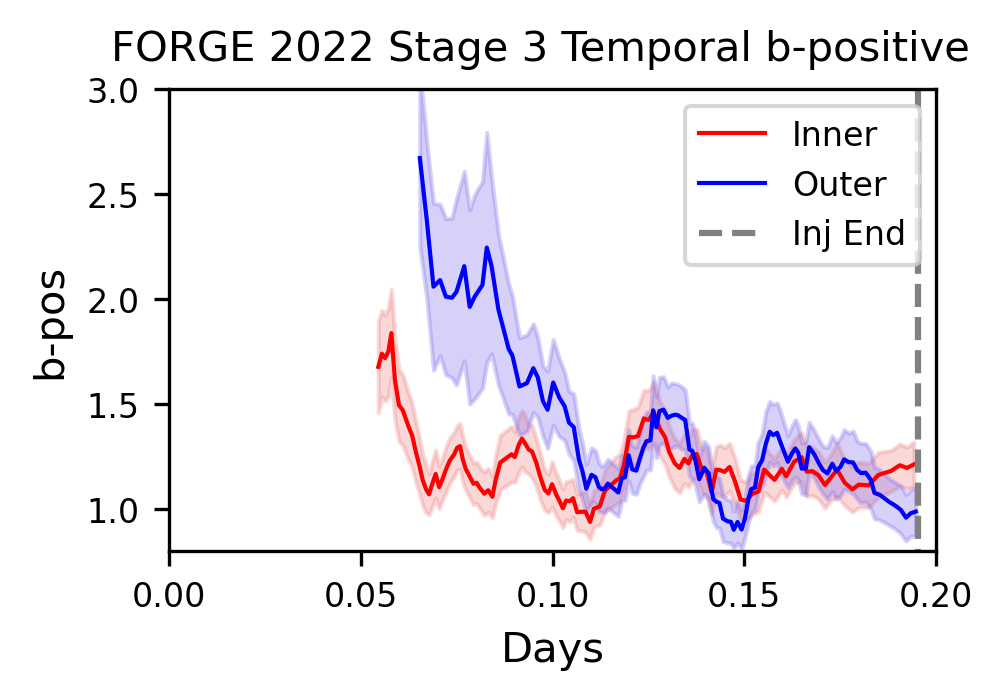

In [27]:
fig, ax1 = plt.subplots(figsize=(3.3,2),dpi=300)
fig.suptitle("FORGE 2022 Stage 3 Temporal b-positive",fontsize=10)
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')
ax1.set_xlim(0,0.2)
ax1.vlines(injEnd,0.7,3.6,colors='grey',linestyles='--',label='Inj End')
ax1.set_ylim([0.8,3])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_ylabel('b-pos',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)


plt.legend(loc = 'upper right',fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\IO Shell Resize\forge2022.png",bbox_inches='tight', pad_inches=0.05)

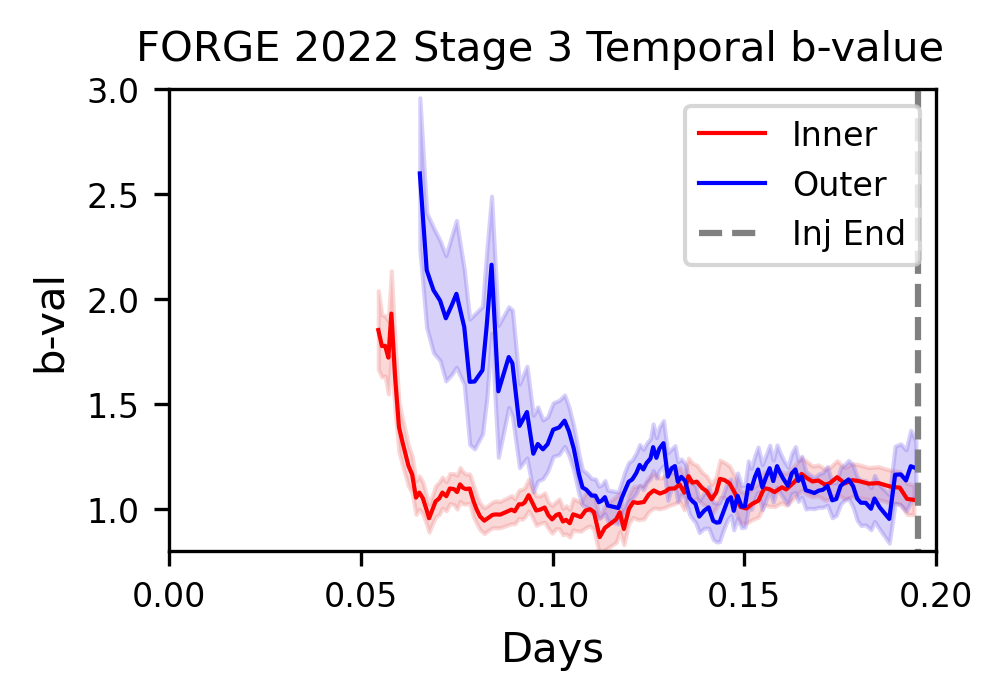

In [28]:
fig, ax1 = plt.subplots(figsize=(3.3,2),dpi=300)
fig.suptitle("FORGE 2022 Stage 3 Temporal b-value",fontsize=10)
ax1.plot(dtr2[0],br2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(br2[0],stdr2[0]), np.add(br2[0],stdr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],br2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(br2[1],stdr2[1]), np.add(br2[1],stdr2[1]), alpha = 0.3, color = 'mediumslateblue')
ax1.set_xlim(0,0.2)
ax1.vlines(injEnd,0.7,3.6,colors='grey',linestyles='--',label='Inj End')
ax1.set_ylim([0.8,3])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_ylabel('b-val',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)


plt.legend(loc = 'upper right',fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\IO Shell Resize\forge2022.png",bbox_inches='tight', pad_inches=0.05)

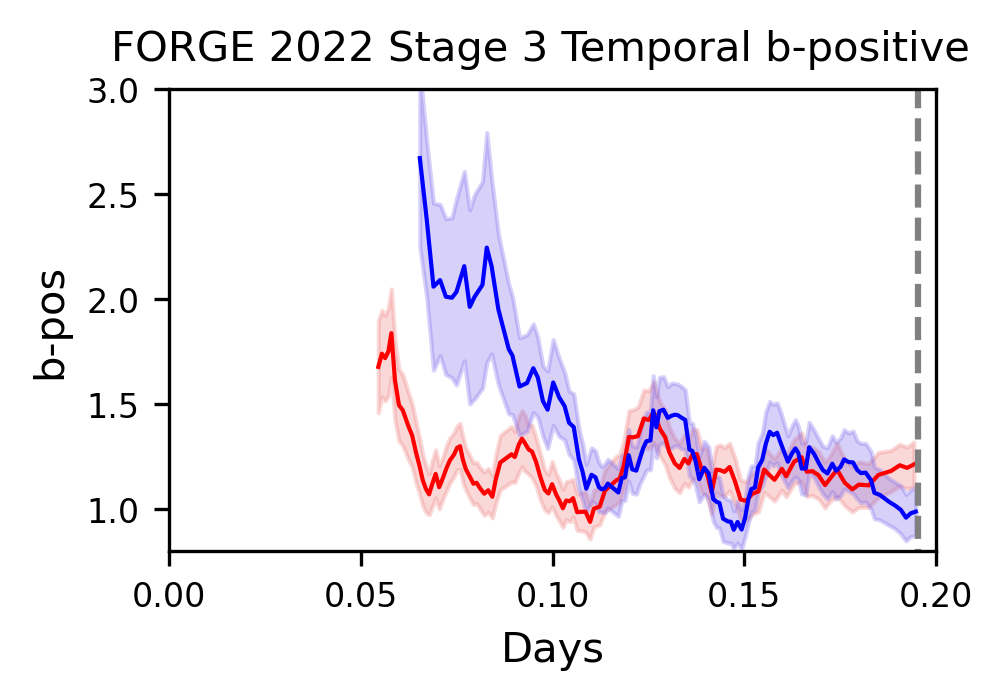

In [29]:
fig, ax1 = plt.subplots(figsize=(3.3,2),dpi=300)
fig.suptitle("FORGE 2022 Stage 3 Temporal b-positive",fontsize=10)
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')
ax1.set_xlim(0,0.2)
ax1.vlines(injEnd,0.7,3.6,colors='grey',linestyles='--',label='Inj End')
ax1.set_ylim([0.8,3])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_ylabel('b-pos',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)


#plt.legend(loc = 'upper right',fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\IO Shell Resize\forge2022 sansLgnd.png",bbox_inches='tight', pad_inches=0.05)

[]

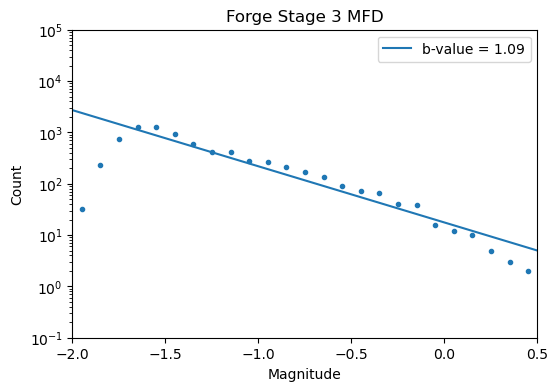

In [30]:
# Calculate b-value for the 'Mag_S' column 
bins = np.arange(-2, 6, 0.1)
b, Mc, hist = b_value_functions.btrad(np.array(magF), bins, delta_b = 0.00001)

x = bins
y_Mc = hist[0][np.argmax(hist[0])+2]
a = np.log10(y_Mc) + b*Mc

best_fit = 10**(a-b*x)


# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
figure = plt.figure(figsize = [6,4])
ax1 = figure.add_subplot(111)

ax1.scatter(mid_bins, hist[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-value = '+str(np.round(b,2)))

ax1.set_xlim([-2, 0.5])
ax1.set_ylim([10**-1, 10**5])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Count')
ax1.set_title('Forge Stage 3 MFD')
plt.plot()

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ] 508


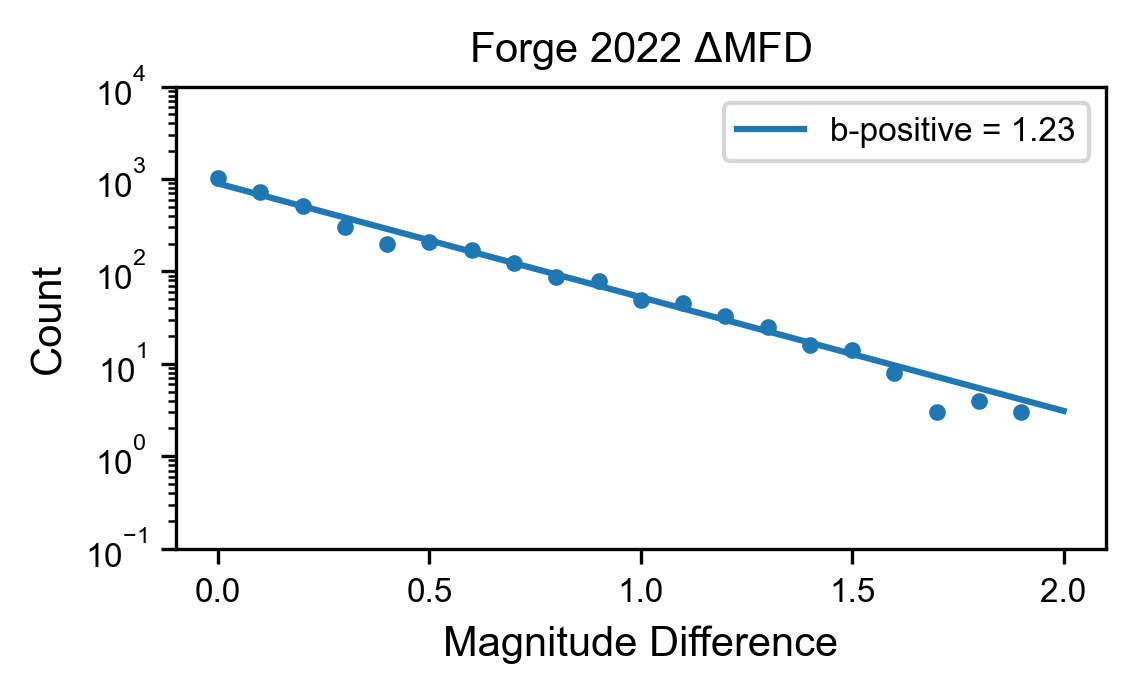

In [46]:
# Calculate b-value for the 'Mag_S' column 

hist1, bP = b_value_functions.bpos(magF)

x = hist1[1]
yint = hist1[0][2]
print(x,yint)
#a = np.log10(yint) + b*Mc

best_fit = 10**(np.log10(yint)-bP*(x-0.2))


# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
#mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
fig, ax1 = plt.subplots(figsize=(4,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
hisP = np.copy(hist1[1])
hisP = hisP[:-1]
ax1.scatter(hisP, hist1[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-positive = '+str(np.round(bP,2)))

#ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax1.set_xlabel('Magnitude Difference',fontsize=10)
ax1.set_ylabel('Count',fontsize=10)
ax1.set_title('Forge 2022 $\Delta$MFD',fontsize=10)
plt.plot()

fig.savefig(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd/Forge2022 DMFD.png',bbox_inches='tight', pad_inches=0.05)
# '/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd'

1.1984887663270565 1.2606413949450601


[]

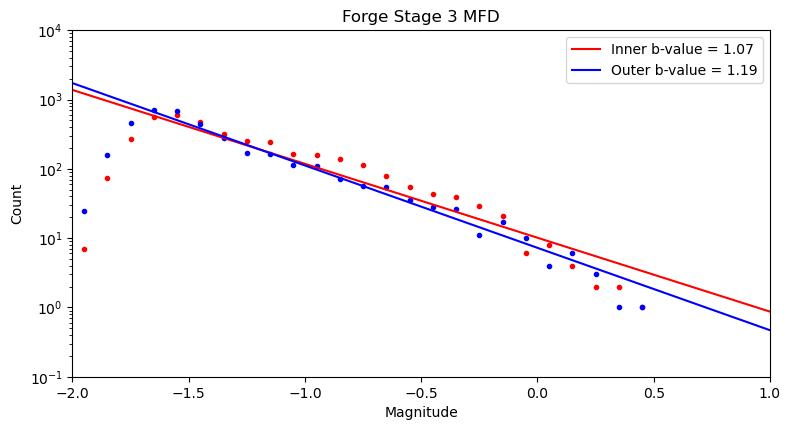

In [38]:
# Inner and Outer MFD for Matched Filter Basel 2006
inner=[]
outer=[]

for i in range(len(sDivs2[0])):
    inner.append(magF[sDivs2[0][i]])
for i in range(len(sDivs2[1])):
    outer.append(magF[sDivs2[1][i]])
    
bins = np.arange(-2, 6, 0.1)
bi, Mci, histi = b_value_functions.btrad(np.array(inner), bins, delta_b = 0.001)
bo, Mco, histo = b_value_functions.btrad(np.array(outer), bins, delta_b = 0.001)
histi1, bPi = b_value_functions.bpos(np.array(inner))
histo1, bPo = b_value_functions.bpos(np.array(outer))
print(bPi, bPo)

x = bins
y_Mci = histi[0][np.argmax(histi[0])+2]
ai = np.log10(y_Mci) + bi*Mci

best_fiti = 10**(ai-bi*x)

x = bins
y_Mco = histo[0][np.argmax(histo[0])+2]
ao = np.log10(y_Mco) + bo*Mco
best_fito = 10**(ao-bo*x)

# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
figure = plt.figure(figsize = [9,4.5])
ax1 = figure.add_subplot(111)

ax1.scatter(mid_bins, histi[0], marker = '.',color='r')
ax1.plot(x, best_fiti, label = 'Inner b-value = '+str(np.round(bi,2)),color='r')

ax1.scatter(mid_bins, histo[0], marker = '.',color='b')
ax1.plot(x, best_fito, label = 'Outer b-value = '+str(np.round(bo,2)),color='b')

ax1.set_xlim([-2, 1])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Count')
ax1.set_title('Forge Stage 3 MFD')
plt.plot()

1.1984887663270565 1.2606413949450601


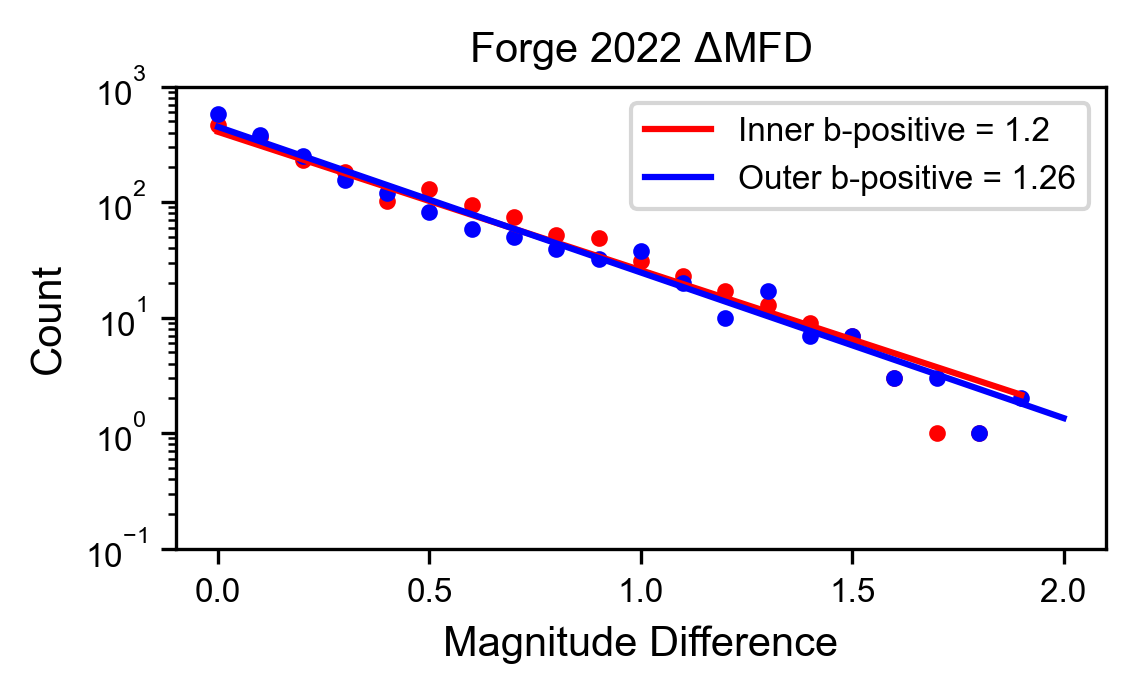

In [44]:
# Inner and Outer MFD for Matched Filter Basel 2006
inner=[]
outer=[]

for i in range(len(sDivs2[0])):
    inner.append(magF[sDivs2[0][i]])
for i in range(len(sDivs2[1])):
    outer.append(magF[sDivs2[1][i]])
    

histi1, bPi = b_value_functions.bpos(np.array(inner))
histo1, bPo = b_value_functions.bpos(np.array(outer))
print(bPi, bPo)



#x = hist1[1] yint = hist1[0][2] print(x,yint) best_fit = 10**(np.log10(yint)-bP*(x-0.2)) 

xi = histi1[1]
y_Mci = histi1[0][2]
best_fiti = 10**(np.log10(y_Mci)-bPi*(xi-0.2))

xo = histo1[1]
y_Mco = histo1[0][2]
best_fito = 10**(np.log10(y_Mco)-bPo*(xo-0.2))

# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 


# Plot results 
fig, ax1 = plt.subplots(figsize=(4,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'

ax1.scatter(np.copy(histi1[1])[:-1], histi1[0], marker = '.',color='r')
ax1.plot(xi, best_fiti, label = 'Inner b-positive = '+str(np.round(bPi,2)),color='r')

ax1.scatter(np.copy(histo1[1])[:-1], histo1[0], marker = '.',color='b')
ax1.plot(xo, best_fito, label = 'Outer b-positive = '+str(np.round(bPo,2)),color='b')

#ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([10**-1, 10**3])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_xlabel('Magnitude Difference',fontsize=10)
ax1.set_ylabel('Count',fontsize=10)
ax1.set_title('Forge 2022 $\Delta$MFD',fontsize=10)
plt.plot()
fig.savefig(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd/Forge2022 IO DMFD.png',bbox_inches='tight', pad_inches=0.05)
# '/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd'